This example was taken from the book **The Essence of Chaos** by *Edward Lorenz*. 

$$\frac{dX}{dt} = U, \ \frac{dY}{dt} = V, \ \frac{dZ}{dt} = W.$$

\begin{align}
\frac{dU}{dt} &= -F \partial_x H - cU, \\
\frac{dV}{dt} &= -F \partial_y H - cV, \\
\frac{dW}{dt} &= -g + F - cW.
\end{align}

and

\begin{align}
\frac{d \vec{U}}{dt} &= -F \nabla H - c \vec{U}, \\
\end{align}

$$H(x,y) = -ax - b \ cos(px) \ cos(qy)$$

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
a = 0.25
b = 0.4
q = (2*np.pi)/4.0
p = (2*np.pi)/10.0

def H_test(x,y):
    return -a*x - b*np.cos(p*x)*np.cos(q*y) 

def pits_n_crests(x,y):
    return - b*np.cos(p*x)*np.cos(q*y) 

In [27]:
x_range = np.linspace(0, 20, 200)
y_range = np.linspace(-10, 10, 200)

In [28]:
XX, YY = np.meshgrid(x_range, y_range)

In [29]:
moguls = H_test(XX, YY)

In [31]:
from mpl_toolkits.mplot3d import Axes3D

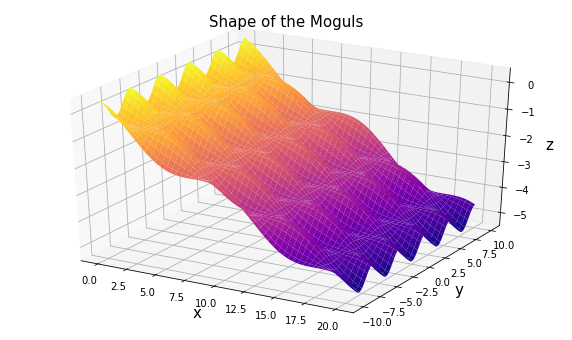

In [42]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

ax.set_ylabel('y', fontsize = 15)
ax.set_xlabel('x', fontsize = 15)
ax.set_zlabel('z', fontsize = 15)
ax.set_title('Shape of the Moguls', fontsize = 15)

ax.plot_surface(XX, YY, moguls, cmap = 'plasma')

In [71]:
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

In [69]:
solver = RK45(sled, 0, [0,-0.1,4,2], t_f, vectorized = True)

In [70]:
print(solver.step())

None


In [85]:
def sled(t, X_0):
    
    x0 = np.copy(X_0[0])
    y0 = np.copy(X_0[1])
    u0 = np.copy(X_0[2])
    v0 = np.copy(X_0[3])
    
    g = 9.81
    c = 0.5
    a = 0.25
    b = 0.5
    p = (2*np.pi)/10.0
    q = (2*np.pi)/4.0
    
    H = -a*x0 - b*np.cos(p*x0)*np.cos(q*y0) 
    H_x = -a + b*p*np.sin(p*x0)*np.cos(q*y0)
    H_xx = b*p**2 * np.cos(p*x0)*np.cos(q*y0)
    H_y = b*q*np.cos(p*x0)*np.sin(q*y0)
    H_yy = b*q**2 * np.cos(p*x0)*np.cos(q*y0)
    H_xy = -b*q*p*np.sin(p*x0)*np.sin(q*y0)
        
    F = (g + H_xx*u0**2 + 2*H_xy*u0*v0 + H_yy*v0**2)/(1 + H_x**2 + H_y**2)
    
    dU = -F*H_x - c*u0
    dV = -F*H_y - c*v0
    
    return np.array([u0, v0, dU, dV])

In [11]:
t_f = 15

sol_1 = solve_ivp(sled, [0, t_f], [0,-0.1,4,2])
sol_2 = solve_ivp(sled, [0, t_f], [0,0.0,4,2])
sol_3 = solve_ivp(sled, [0, t_f], [0,0.1,4,2])
sol_4 = solve_ivp(sled, [0, t_f], [0,0.2,4,2])

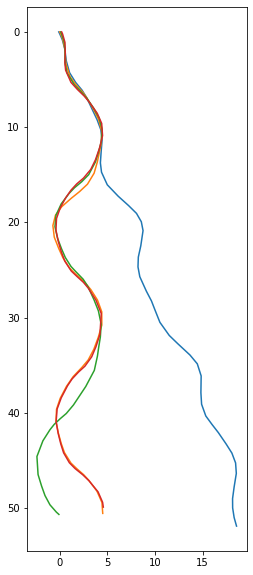

In [12]:
plt.figure(figsize=(5,10))
plt.plot(sol_1.y[1], sol_1.y[0])
plt.plot(sol_2.y[1], sol_2.y[0])
plt.plot(sol_3.y[1], sol_3.y[0])
plt.plot(sol_4.y[1], sol_4.y[0])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')

The previous system is not compact, i.e., $X$ and $Y$ can grow infinitidly. 

In [13]:
x_range_compact = np.linspace(-5, 5, 50)
y_range_compact = np.linspace(-2, 2, 50)
XX_c, YY_c = np.meshgrid(x_range_compact, y_range_compact)

In [14]:
moguls_compact = pits_n_crests(XX_c, YY_c)

Text(0, 0.5, '$x$')

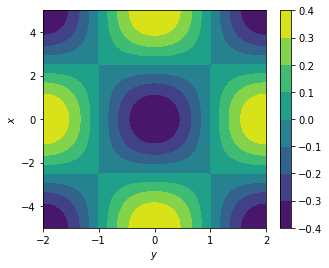

In [15]:
plt.figure(figsize=(5,4))
plt.contourf(YY_c, XX_c, moguls_compact)
plt.colorbar()
plt.xlabel(r'$y$')
plt.ylabel(r'$x$')

In [16]:
def compactor(x, lower_bound, upper_bound):
    
    if x > upper_bound: 
        return x%upper_bound - upper_bound
    elif x < lower_bound: 
        return x%lower_bound - lower_bound
    else: 
        return x

In [17]:
compactor(2.6, -2.5, 2.5)

-2.4

In [22]:
def sled_compact(t, X_0):
    
    x0 = np.copy(X_0[0])
    y0 = np.copy(X_0[1])
    u0 = np.copy(X_0[2])
    v0 = np.copy(X_0[3])
    
    x0 = compactor(x0, -5, 5)
    y0 = compactor(y0, -2, 2)
    
    g = 9.81
    c = 0.5
    a = 0.25
    b = 0.5
    p = (2*np.pi)/10.0
    q = (2*np.pi)/4.0
    
    H = -a*x0 - b*np.cos(p*x0)*np.cos(q*y0) 
    H_x = -a + b*p*np.sin(p*x0)*np.cos(q*y0)
    H_xx = b*p**2 * np.cos(p*x0)*np.cos(q*y0)
    H_y = b*q*np.cos(p*x0)*np.sin(q*y0)
    H_yy = b*q**2 * np.cos(p*x0)*np.cos(q*y0)
    H_xy = -b*q*p*np.sin(p*x0)*np.sin(q*y0)
        
    F = (g + H_xx*u0**2 + 2*H_xy*u0*v0 + H_yy*v0**2)/(1 + H_x**2 + H_y**2)
    
    dU = -F*H_x - c*u0
    dV = -F*H_y - c*v0
    
    return np.array([u0, v0, dU, dV])

In [86]:
t_f = 10

sol_1 = solve_ivp(sled, [0, t_f], [0,0,4,2], first_step=0.01)

In [87]:
sol_1

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 301
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.01      ,  0.11      ,  0.31193724,  0.60831924,
        0.98370974,  1.35910023,  1.56464418,  1.80814265,  2.05164111,
        2.41003892,  2.72596949,  3.01896562,  3.37052494,  3.69031187,
        4.01009879,  4.54687572,  4.83091576,  5.09872614,  5.36653652,
        5.67523748,  5.95270124,  6.23016501,  6.56137107,  6.87003792,
        7.17870477,  7.5068506 ,  7.70388515,  7.92069564,  8.17981133,
        8.60135088,  9.02289044,  9.44442999,  9.72939725, 10.        ])
 t_events: None
        y: array([[ 0.00000000e+00,  4.01083572e-02,  4.49757507e-01,
         1.27633287e+00,  2.40143439e+00,  3.67408479e+00,
         4.84396400e+00,  5.48712712e+00,  6.29722464e+00,
         7.07125826e+00,  8.16903625e+00,  9.30923082e+00,
         1.05952886e+01,  1.20825106e+01,  1.32198740

for the compact model I need to write my own RK function

In [100]:
def runge_kutta_step(f, x0, dt):
       
    k1 = f(x0) * dt
    k2 = f(x0 + k1/2) * dt
    k3 = f(x0 + k2/2) * dt
    k4 = f(x0 + k3) * dt
    x_new = x0 + (k1 + 2*k2 + 2*k3 + k4)/6
    
    return x_new


In [93]:
runge_kutta_step(sled, 0, [0.2,0.2,0.0,0.], 0.1)

array([ 0.20929997,  0.18954229,  0.1845474 , -0.20601907])

In [97]:
a = np.zeros((3,3))

In [99]:
a[:, 1]

array([0., 0., 0.])

In [94]:
def solver(f, x0, dt, N_t, N):
    
    solution = np.zeros(4, N_t+1, N)
    solution[:,0, 0]
    
    for i in range(1,N_t+1):
        for k in range(N):
            
            x_0_step = solution[:, i-1, k]
            
            solution[:,i, k] = runge_kutta_step(f, i, x_0_step, dt)
            
    return solution

In [ ]:
solver(sled, )